In [1]:
import generate_teams as gene
import opinion_dynamics as od

### human-AI team ensembles

### human-AI team ensembles

In [ ]:
# uniER-non
paras = {
    'N': 500,
    'd': 10,
    'rho': 0.2,
    'k': 3 # interaction size
}
T = gene.generate_T_unier_non(**paras)

In [ ]:
# epsilons near the transition
# epsilons = [0.27, 0.294, 0.228, 0.312]

## Trajectories near the transition

In [71]:
paras = {
    'T': T,
    'epsilon': 0.294,
    'mu': 1, # human trust in AI
    'alpha': 1, # AI receptivity level
    'sweep': (1000, 1e-3),
    'Tmax': 10000
}
states = od.od_ana7(**paras)

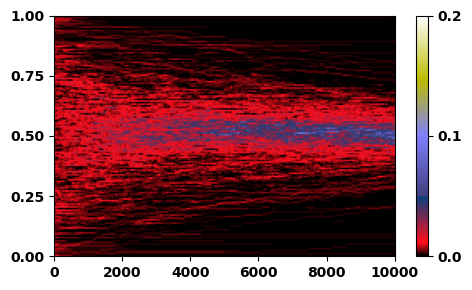

In [72]:
od.plot_opinion_trajectory(states, nbins=150, figsize=(5,3), cmap='gist_stern', info='ERk5a100')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime
import os
def plot_opinion_trajectory(states, nbins=100, clip_max=0.2,
                            figsize=(8, 4), cmap='gray_r', info=None):
    # -------- 1. 组织数据：states -> density 矩阵 -------- #
#     states = states[:10000]
    states = [np.asarray(s, dtype=float) for s in states]
    T = len(states)
    if T == 0:
        raise ValueError("states 为空，无法绘图。")

    N = len(states[0])
    bins = np.linspace(0, 1, nbins + 1)

    # H[t, j] 表示在时间 t，落在 bin j 的节点数量
    H = np.zeros((T, nbins), dtype=float)
    for t in range(T):
        hist, _ = np.histogram(states[t], bins=bins)
        H[t] = hist

    # 转换为“相对密度”：每个时间步内的频率（也可以用 / N）
    H_frac = H / N  # 现在每个时间步内，sum(H_frac[t, :]) ≈ 1

    # -------- 2. 按你要求：clip + 映射到 [0, clip_max] -------- #
    # 大于 clip_max 的密度，全部截断为 clip_max，这样颜色上都用最深色表示
    H_clipped = np.clip(H_frac, 0.0, clip_max)

    # 构造颜色归一化：明确指定 vmin=0, vmax=clip_max
    norm = mcolors.Normalize(vmin=0.0, vmax=clip_max)

    # -------- 3. 画图 -------- #
    plt.figure(figsize=figsize)

    # 注意：这里使用 H_clipped.T，y 轴是意见值（0~1）
    im = plt.imshow(
        H_clipped.T,
        aspect='auto',
        origin='lower',
        cmap=cmap,
        norm=norm,                # 控制颜色范围是 [0, clip_max]
        extent=[0, T, 0, 1]       # x: time steps, y: opinion in [0,1]
    )

    # colorbar 显示的数值范围也会是 [0, clip_max]
    cbar = plt.colorbar(im, ticks=[0, 0.1, 0.2])
    
    for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels() + cbar.ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.yticks([0,0.25,0.5,0.75,1.0])
    plt.tight_layout()

#     filename = f"{info}" + 't' + datetime.now().isoformat().split(":")[-1] + '.jpg'
#     save_dir_figs="figs_trajectory"
#     os.makedirs(save_dir_figs, exist_ok=True)
#     output_path = os.path.join(save_dir_figs, filename)
#     plt.tight_layout()
#     plt.savefig(output_path, dpi=800, bbox_inches="tight")

    plt.show()

# Cluster size distribution

In [125]:
# uniER-non
paras = {
    'N': 500,
    'd': 10,
    'rho': 0.2,
    'k': 3 # interaction size
}
T = gene.generate_T_unier_non(**paras)

In [150]:
# a single realization 
# return states
paras = {
    'T': T,
    'epsilon': 0.27,
    'mu': 1, # human trust in AI
    'alpha': 1, # AI receptivity level
    'sweep': (1000, 1e-3),
    'Tmax': 13000
}
sizes = od.od_ana8(**paras)

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

def show_distribution(sizes, info, N=2000):
    plt.figure(figsize=(4, 1.5))

# 设置 bin 的数量多一些，以展示连续值的细节
    bins = np.linspace(0, 1, 200) 

# 绘制直方图
# weights 用于将 y 轴转化为“占比/概率”，确保总和在 0-1 之间
    counts, bins, patches = plt.hist(
    sizes, 
    bins=bins, 
    color='white', 
    edgecolor='#284C84', 
    weights=np.ones(len(sizes)) / len(sizes),
    linewidth=0.6
    )

# 3. 核心设置：Y 轴对数处理
    plt.yscale('log')

# 设置 Y 轴显示范围从 0.001 到 1
    plt.ylim(0.001, 1)

# 手动设置刻度，确保显示你要求的 0.001, 0.01, 0.1, 1
    ticks = [0.001, 0.01, 0.1, 1]
    plt.yticks(ticks, labels=[str(t) for t in ticks])



# 4. 细节美化
    plt.grid(axis='y', which='major', linestyle='--', alpha=0.5)
    

    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])

    filename = f"{info}" + 't' + datetime.now().isoformat().split(":")[-1] + '.jpg'
    save_dir_figs="figs_ana8"
    os.makedirs(save_dir_figs, exist_ok=True)
    output_path = os.path.join(save_dir_figs, filename)
    plt.tight_layout()
    plt.savefig(output_path, dpi=800, bbox_inches="tight", pad_inches=0)


    plt.tight_layout()
    plt.show()